In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from word_filter import FilterBuilder

from matplotlib import pyplot as plt
import numpy as np

c:\Users\stani\Documents\school\DAS\parliament_spotlight\Parliament_Spotlight_NLP\.env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
features = FilterBuilder('stenozaznamy_psp_sample.pickle').build_features(limit=100)


In [4]:
features['dobrý']

array([0.00277521, 0.00487805, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:

variance_nullcount = np.array([[features[word].mean(), features[word].var(),len(features[word][features[word] != 0])] for word in features])

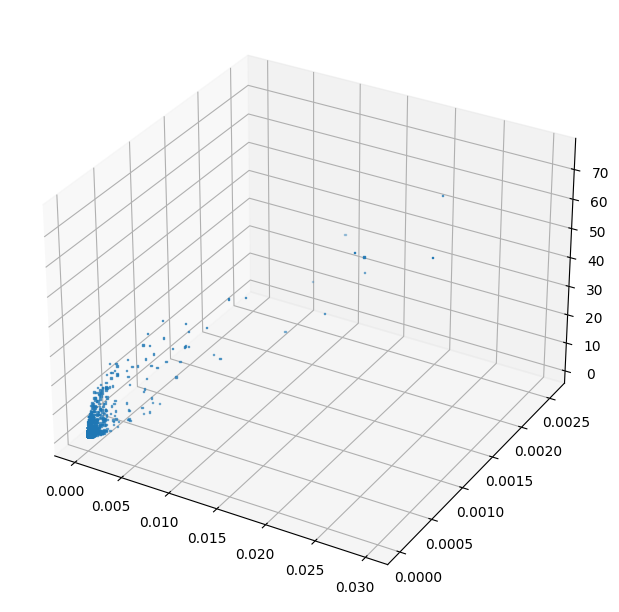

In [6]:
fig = plt.figure(figsize=(26, 26))

ax = fig.add_subplot(131, projection='3d')

ax.scatter(variance_nullcount[:, 0], variance_nullcount[:, 1], variance_nullcount[:, 2], s = 1, marker = ",")

# plt.scatter(variance_nullcount[:, 0], variance_nullcount[:, 1], variance_nullcount[:, 2], s = 1, marker = ",")
plt.show()

In [ ]:
d = {'a': 1, 'b': 2, 'c': 3}
print('a' in d)

In [ ]:
for word in features:
    feature = features[word]
    if len(feature[feature != 0]) / len(feature) >= 0.2:
        print(f'ZAHODIM: {word}')
    else:
        print(f'NECHAM: {word}')

In [ ]:
from transformers import ElectraForPreTraining, ElectraTokenizerFast
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
model = ElectraForPreTraining.from_pretrained('Seznam/small-e-czech')

In [ ]:
tokenizer = ElectraTokenizerFast.from_pretrained("Seznam/small-e-czech")

In [ ]:
from word_filter import WordFilter

In [ ]:
filter = WordFilter()
filter(['ahoj', 'válka', 'Rusko', 'a'], model.electra.embeddings.word_embeddings, tokenizer)

In [ ]:
features = FilterBuilder('stenozaznamy_psp_sample.pickle').build_features(limit=10000)


In [ ]:

counter = 0
words = []
labels = []

loss = nn.BCELoss()
optimizer = optim.Adam(filter.parameters(), lr=1e-4)

for word in features:
    counter += 1
    words.append(word)
    feature = features[word]
    N = len(feature)
    notnulls = len(feature[feature != 0])
    labels.append(1.0 * (notnulls / N <= 0.1))
    if counter % 100 == 0:
        
        optimizer.zero_grad()
        results, counts = filter(words, model.electra.embeddings.word_embeddings, tokenizer)
        t_labels = []
        for i in range(len(counts)):
            for j in range(counts[i]):
                t_labels.append(labels[i])
        t_labels = torch.tensor(t_labels)
        loss_value = loss(results, t_labels)
        loss_value.backward()
        optimizer.step()
        labels = []
        words = []
        print(f'EPOCH: {counter / 100}; LOSS: {loss_value.item()}')


In [ ]:
filter(['a'], model.electra.embeddings.word_embeddings, tokenizer)